In [12]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [19]:
df = pd.read_csv('../../data/data_set.csv', encoding='latin-1')

In [20]:
print(df.head())

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [22]:
print(df.columns)


Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


In [24]:
X = df.drop(columns=['Email No.', 'Prediction'])

In [25]:
y = df['Prediction']

In [26]:
print(y.unique())

[0 1]


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [30]:
y_pred = model.predict(X_test)

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9545893719806763
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       739
           1       0.89      0.96      0.92       296

    accuracy                           0.95      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.95      0.96      1035



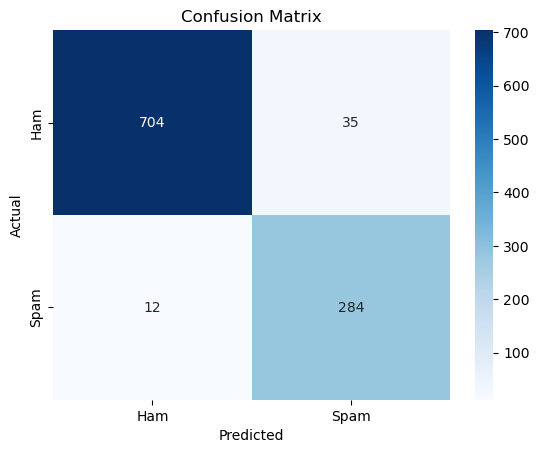

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
joblib.dump(model, 'naive_bayes_model.pkl')
print("Model saved as naive_bayes_model.pkl")


Model saved as naive_bayes_model.pkl


In [34]:
# Load the model
loaded_model = joblib.load('naive_bayes_model.pkl')
print("Model loaded successfully!")


Model loaded successfully!


In [35]:
import pandas as pd
import numpy as np
import string

In [36]:
# Assuming feature_columns is available (e.g., feature_columns = X_train.columns)

def predict_email_spam(email_text, model, feature_columns):
    text = email_text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    email_vector = pd.DataFrame(np.zeros((1, len(feature_columns))), columns=feature_columns)
    for word in words:
        if word in feature_columns:
            email_vector.at[0, word] = 1
    prediction = model.predict(email_vector)[0]
    return "Spam" if prediction == 1 else "Ham"

In [38]:
feature_columns = X_train.columns


In [39]:
import joblib

joblib.dump(list(X_train.columns), 'feature_columns.pkl')
print("Feature columns saved!")


Feature columns saved!


In [40]:
feature_columns = joblib.load('feature_columns.pkl')
print("Feature columns loaded!")


Feature columns loaded!


In [41]:
# Example usage:
test_email = "Congratulations! You have won a free ticket. Claim now!"
result = predict_email_spam(test_email, loaded_model, feature_columns)
print("Prediction:", result)

Prediction: Ham


In [42]:
test_email = "Your new email text here"
result = predict_email_spam(test_email, loaded_model, feature_columns)
print("Prediction:", result)


Prediction: Spam


In [43]:
emails = [
    "Congratulations! You won a free ticket.",
    "Hi, can we meet tomorrow for lunch?",
    "Limited time offer: Buy now!",
    "Please find attached the report."
]

for email in emails:
    result = predict_email_spam(email, loaded_model, feature_columns)
    print(f"Email: {email}\nPrediction: {result}\n")


Email: Congratulations! You won a free ticket.
Prediction: Ham

Email: Hi, can we meet tomorrow for lunch?
Prediction: Ham

Email: Limited time offer: Buy now!
Prediction: Spam

Email: Please find attached the report.
Prediction: Ham

